In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/Keshavpawar137/Data-Science-Assignment/main/Decision%20Tree/heart_disease.csv")


In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


# Data Exploration

In [5]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
df.shape

(908, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [9]:
#imputing missin values
df['oldpeak'].mean()

0.8912529550827422

In [10]:
data=df.copy()
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].mean())

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

# improper data

In [13]:
df['exang'].unique()

array(['FALSE', 'TRUE', 'TURE'], dtype=object)

In [14]:
#As we Observed I have to convert capital letters to small - let's convert this by using

In [15]:
replace_dict = {
    True: 'true',
    False: 'false'
}
df['exang'] = df['exang'].replace(replace_dict)
df['exang'] = df['exang'].apply(lambda x: x.lower() if isinstance(x, str) else x)

df["exang"] = np.where(df["exang"].values == "ture", "true", df["exang"])

In [16]:
df['exang'].value_counts() # cleaned data

exang
false    535
true     373
Name: count, dtype: int64

Text(0.5, 1.0, 'After imputing median with all Null Values')

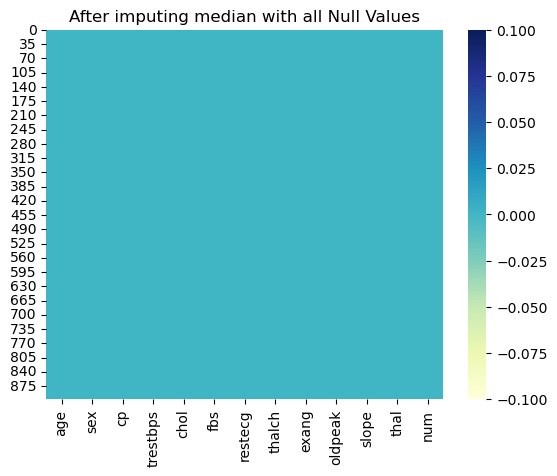

In [17]:
sns.heatmap(data=df.isnull(),cmap='YlGnBu')
plt.title("After imputing median with all Null Values")

In [18]:
# no any null value foud

In [19]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns # spliting numerical data features
for i in df[num_features]:
    print ("---- %s ---" % i)
    print (df[i].value_counts())

---- age ---
age
54    51
58    43
55    41
57    38
56    38
52    36
59    35
51    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
43    24
46    24
64    22
49    22
65    21
44    19
47    19
42    18
45    18
38    16
39    15
67    15
66    13
40    13
69    13
37    11
68    10
35     9
70     7
74     7
36     6
71     5
72     4
34     4
75     3
32     2
31     2
76     2
77     2
29     1
73     1
33     1
30     1
Name: count, dtype: int64
---- trestbps ---
trestbps
120    128
130    114
140    100
110     58
150     55
      ... 
163      1
107      1
174      1
185      1
182      1
Name: count, Length: 85, dtype: int64
---- chol ---
chol
0      172
230      9
211      9
223      9
219      9
      ... 
165      1
161      1
139      1
385      1
109      1
Name: count, Length: 228, dtype: int64
---- thalch ---
thalch
140    42
150    41
120    36
130    30
160    25
       ..
190     1
91      1
185     1
195     1
69      1
Name: count, Lengt

In [20]:
cat_fea = df.select_dtypes(include=['object']).columns # spliting categorical features
for i in df[cat_fea]:
    print ("---- %s ---" % i)
    print (df[i].value_counts())

---- sex ---
sex
Male      718
Female    190
Name: count, dtype: int64
---- cp ---
cp
asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: count, dtype: int64
---- restecg ---
restecg
normal              542
lv hypertrophy      187
st-t abnormality    179
Name: count, dtype: int64
---- exang ---
exang
false    535
true     373
Name: count, dtype: int64
---- slope ---
slope
flat           453
upsloping      298
downsloping    157
Name: count, dtype: int64
---- thal ---
thal
normal               364
reversable defect    355
fixed defect         189
Name: count, dtype: int64


# Data Visualization

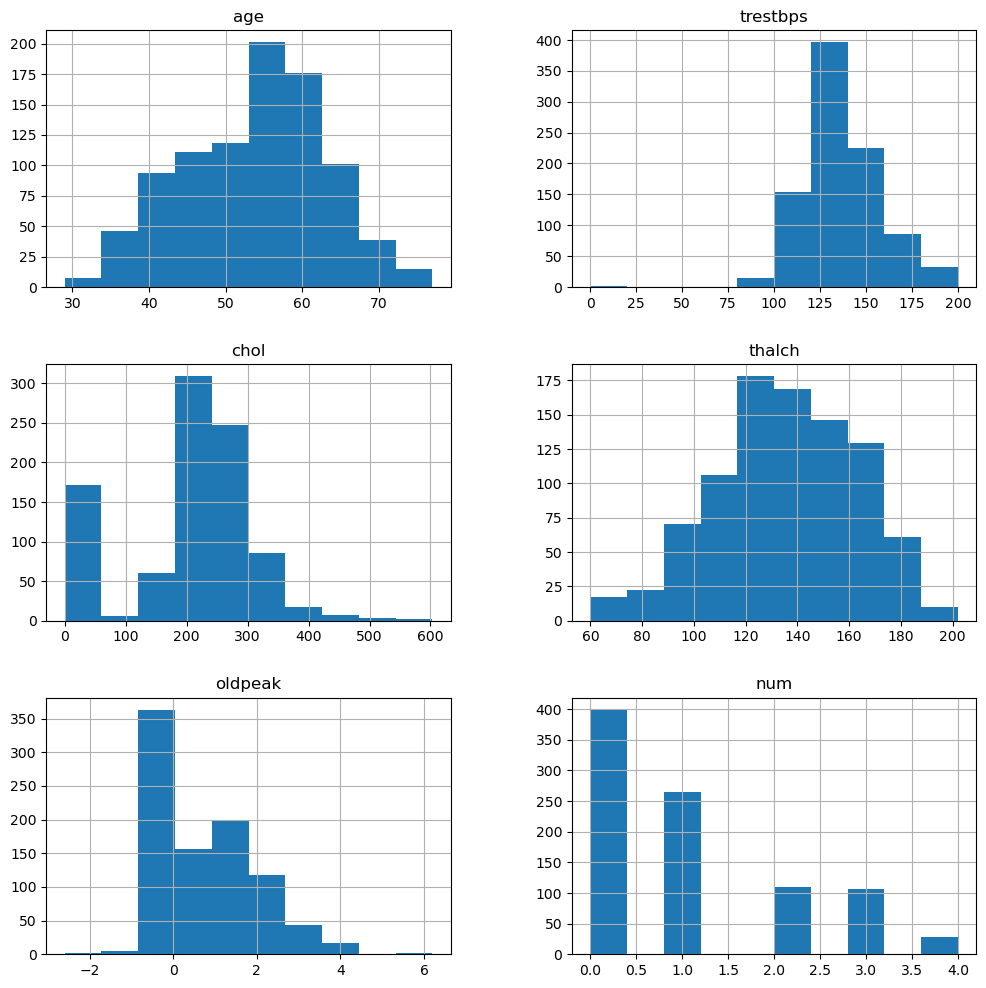

In [22]:

df[num_features].hist(figsize=(12,12))
plt.show()

In [23]:
def box_plot(df):
    # Create box plots for numerical variables
    fig, axes = plt.subplots(df.shape[1], 1, figsize=(10, df.shape[1] * 2))
    axes = axes.flatten()
    for ax, col in zip(axes, df.columns):
        sns.boxplot(x=df[col], ax=ax, palette="crest")
        ax.set_xlabel(col)
        ax.set_ylabel("Range")

    plt.tight_layout()
    plt.show()

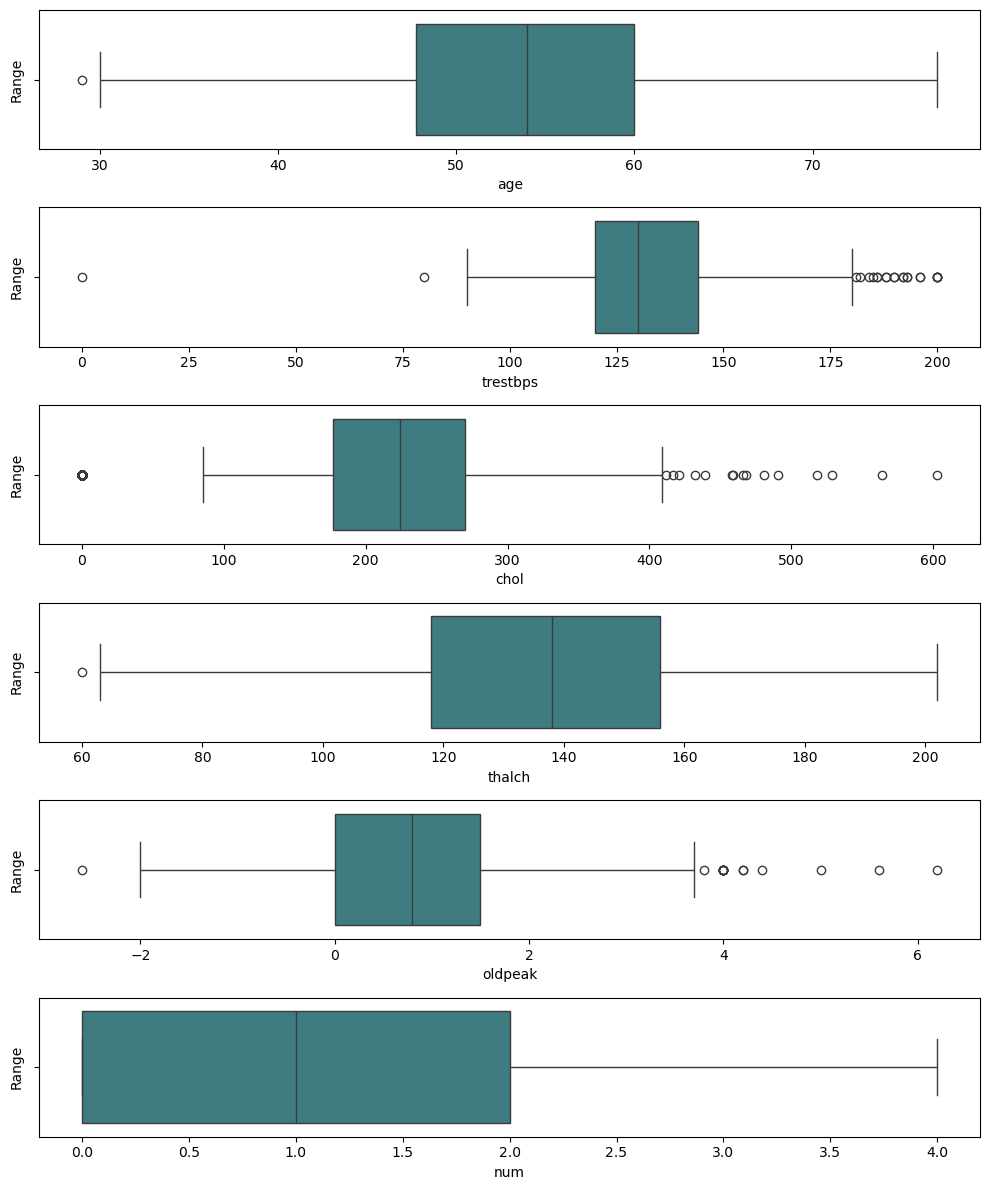

In [24]:
box_plot(df[num_features])


as we saw that there are few outliers are present

                 Count       %
cp                            
asymptomatic       495  54.52%
non-anginal        203  22.36%
atypical angina    165  18.17%
typical angina      45   4.96%


Text(0.5, 1.0, 'chest pain distribution')

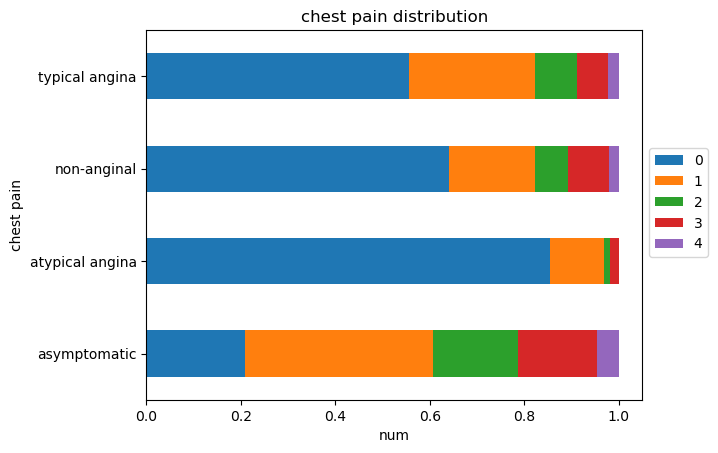

In [26]:
t=df.cp
counts=t.value_counts()
percentage= t.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
tab=pd.DataFrame({"Count": counts, "%": percentage })
print(tab)

#gender ditribution 
gender_group = df.groupby(['cp', 'num']).size().unstack()
gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend(bbox_to_anchor=(1.0, 0.7))
plt.ylabel('chest pain')
plt.xlabel('num')
plt.title("chest pain distribution")

                  Count       %
restecg                        
normal              542  59.69%
lv hypertrophy      187  20.59%
st-t abnormality    179  19.71%


Text(0.5, 1.0, 'restecg distribution')

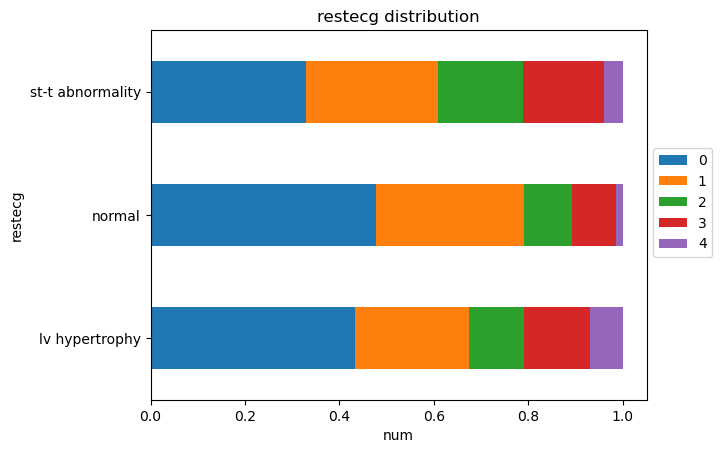

In [27]:
t=df.restecg
counts=t.value_counts()
percentage= t.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
tab=pd.DataFrame({"Count": counts, "%": percentage })
print(tab)

#gender ditribution 
gender_group = df.groupby(['restecg', 'num']).size().unstack()
gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend(bbox_to_anchor=(1.0, 0.7))
plt.ylabel('restecg')
plt.xlabel('num')
plt.title("restecg distribution")

                  Count       %
restecg                        
normal              542  59.69%
lv hypertrophy      187  20.59%
st-t abnormality    179  19.71%


Text(0.5, 1.0, 'exang distribution')

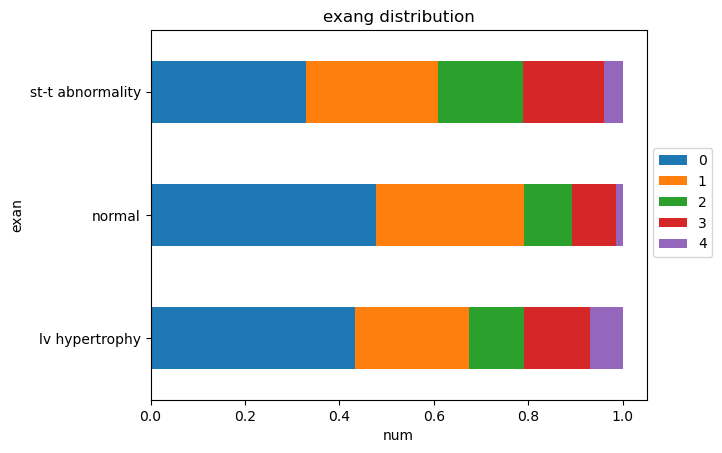

In [28]:
t=df.restecg
counts=t.value_counts()
percentage= t.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
tab=pd.DataFrame({"Count": counts, "%": percentage })
print(tab)

#gender ditribution 
gender_group = df.groupby(['restecg', 'num']).size().unstack()
gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend(bbox_to_anchor=(1.0, 0.7))
plt.ylabel('exan')
plt.xlabel('num')
plt.title("exang distribution")

                  Count       %
restecg                        
normal              542  59.69%
lv hypertrophy      187  20.59%
st-t abnormality    179  19.71%


Text(0.5, 1.0, 'slope distribution')

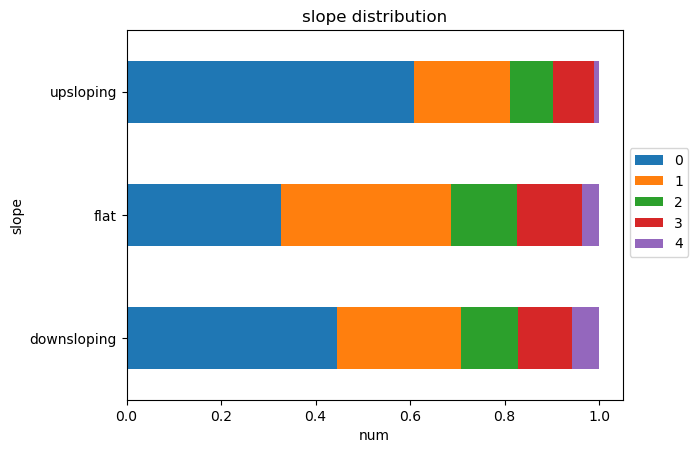

In [29]:
t=df.restecg
counts=t.value_counts()
percentage= t.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
tab=pd.DataFrame({"Count": counts, "%": percentage })
print(tab)

#gender ditribution 
gender_group = df.groupby(['slope', 'num']).size().unstack()
gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend(bbox_to_anchor=(1.0, 0.7))
plt.ylabel('slope')
plt.xlabel('num')
plt.title("slope distribution")

 # Encoding Techniques

Label Encoding:

Let's apply label encoding for categorical columns

In [32]:
cat_fea

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["cp"]=le.fit_transform(df["cp"])
df["restecg"]=le.fit_transform(df["restecg"])
df["exang"]=le.fit_transform(df["exang"])
df["slope"]=le.fit_transform(df["slope"])
df["thal"]=le.fit_transform(df["thal"])
df["sex"]=le.fit_transform(df["sex"])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,0,2.3,0,0,0
1,41,1,1,135,203,False,1,132,0,0.0,1,0,0
2,57,1,0,140,192,False,1,148,0,0.4,1,0,0
3,52,1,3,118,186,False,0,190,0,0.0,1,0,0
4,57,1,0,110,201,False,1,126,1,1.5,1,0,0


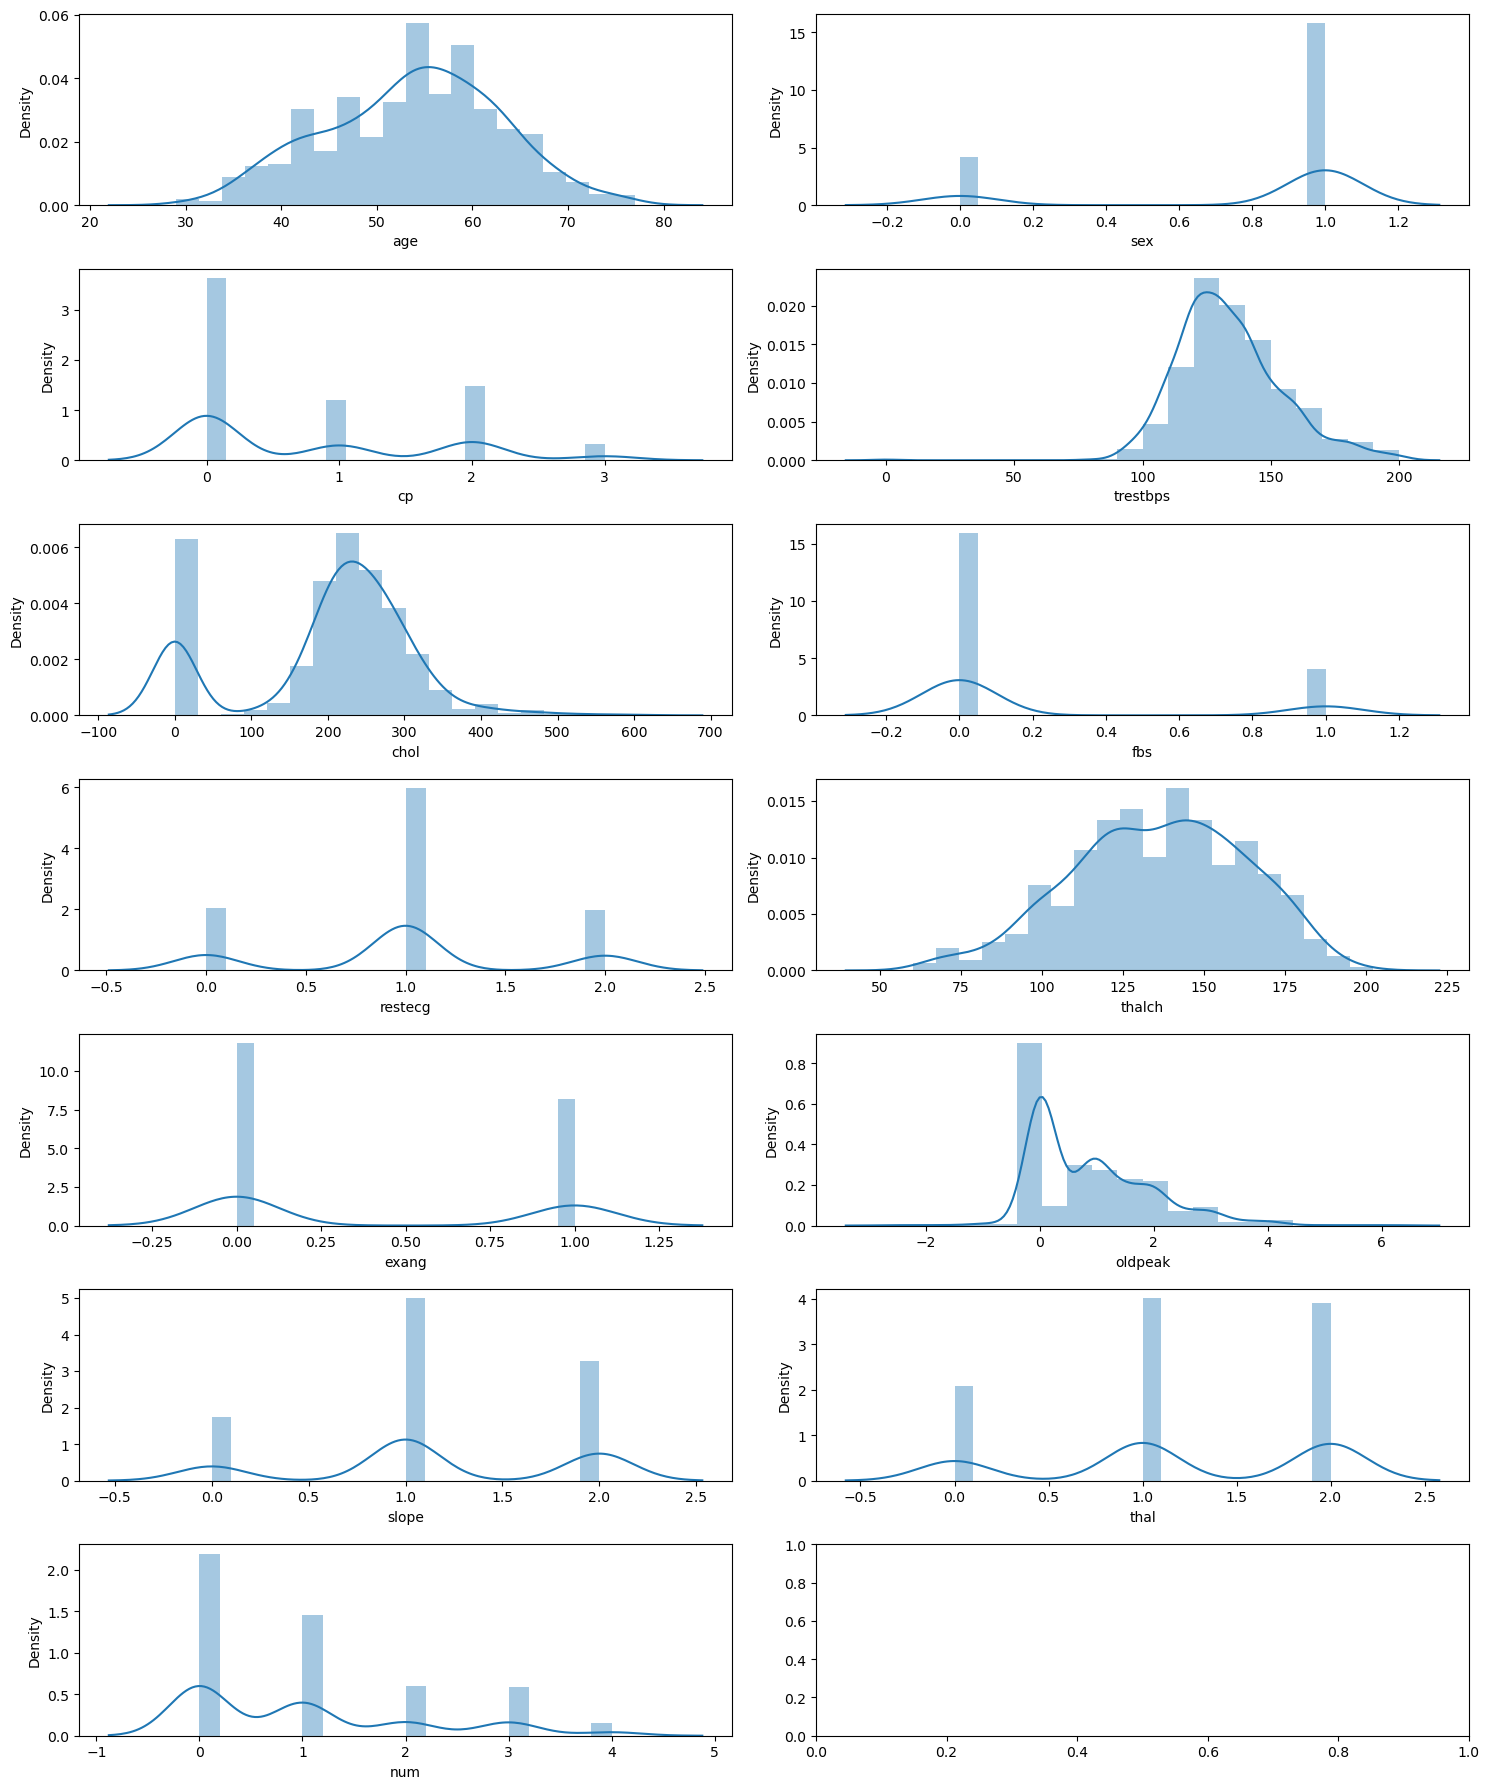

In [34]:
fig, axes = plt.subplots(7,2, figsize=(15,18))  # 5 rows, 2 columns

# Flatten the axes to make iteration easier
axes = axes.flatten()

# Iterate over the columns and subplots to create KDE plots
for ax, col in zip(axes, df.columns):
    sns.distplot(df[col], ax=ax, bins=20)  # Plot KDE on the specified subplot
    ax.set_ylabel('Density')  # KDE plots often use "Density" as y-axis label

# Adjust layout to avoid overlapping and ensure proper spacing
plt.tight_layout()

# Display the plots
plt.show()

# Outliers

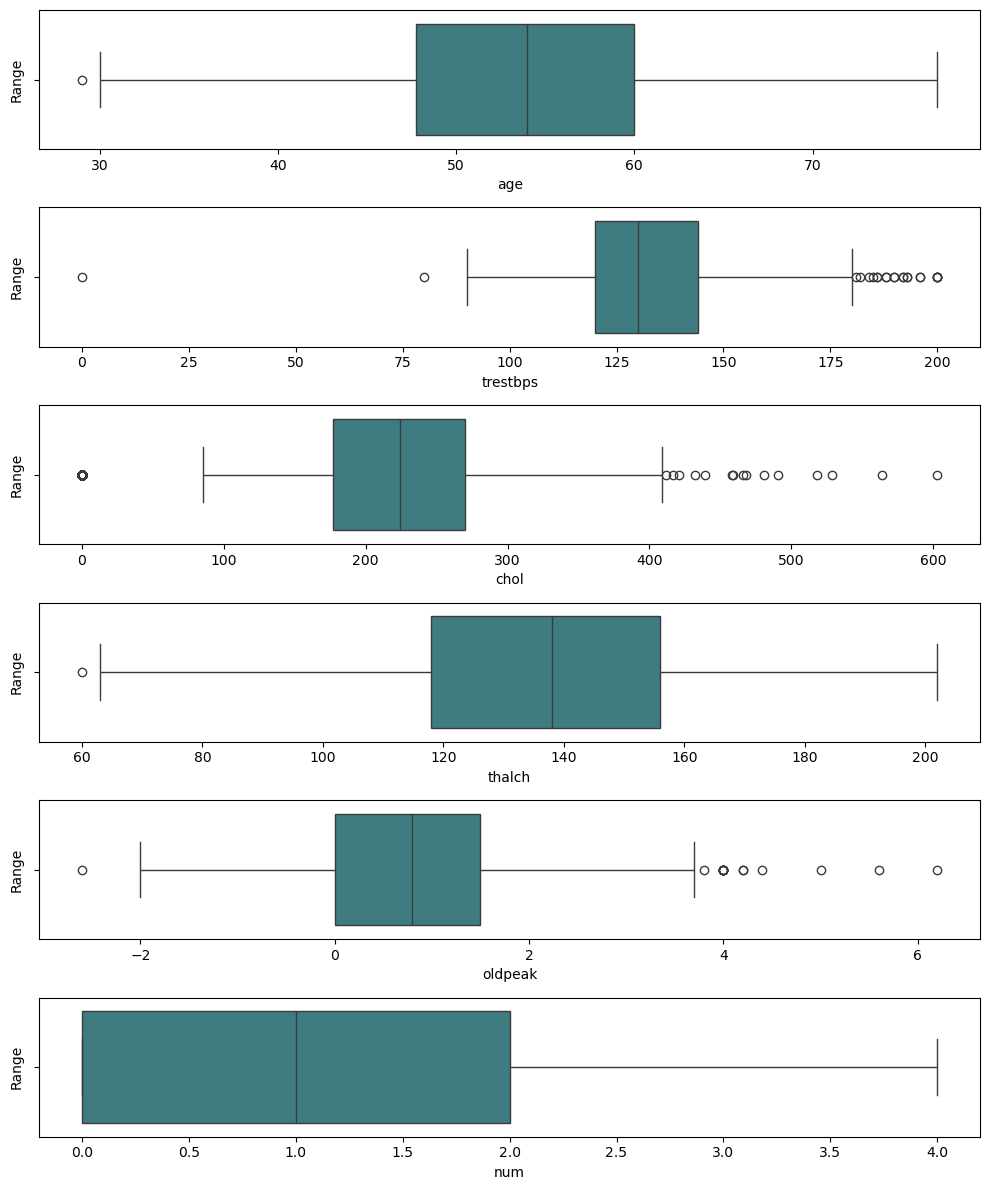

In [36]:
box_plot(df[num_features])


In [37]:
from sklearn.ensemble import IsolationForest
# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.25, random_state=42)
outliers = iso_forest.fit_predict(df[num_features])

In [38]:
# -1 indicates an outlier, 1 indicates an inlier
df['outlier'] = outliers
df["outlier"].value_counts()


outlier
 1    681
-1    227
Name: count, dtype: int64

As we can see that there are outliers present

In [40]:
# Remove outliers
cleaned_data = df[df['outlier'] == 1].drop(columns=['outlier'])

print(cleaned_data)

     age  sex  cp  trestbps  chol    fbs  restecg  thalch  exang   oldpeak  \
0     63    1   3       145   233   True        0     150      0  2.300000   
1     41    1   1       135   203  False        1     132      0  0.000000   
2     57    1   0       140   192  False        1     148      0  0.400000   
3     52    1   3       118   186  False        0     190      0  0.000000   
4     57    1   0       110   201  False        1     126      1  1.500000   
..   ...  ...  ..       ...   ...    ...      ...     ...    ...       ...   
858   57    1   0       110     0  False        2     131      1  1.400000   
864   65    1   0       150   236   True        2     105      1  0.000000   
865   63    1   2       130     0  False        2     111      1  0.000000   
867   69    1   0       140   208  False        2     140      1  2.000000   
871   51    1   2       151   339  False        1     122      0  0.891253   

     slope  thal  num  
0        0     0    0  
1        1     

After removing outliers by using isolation forest

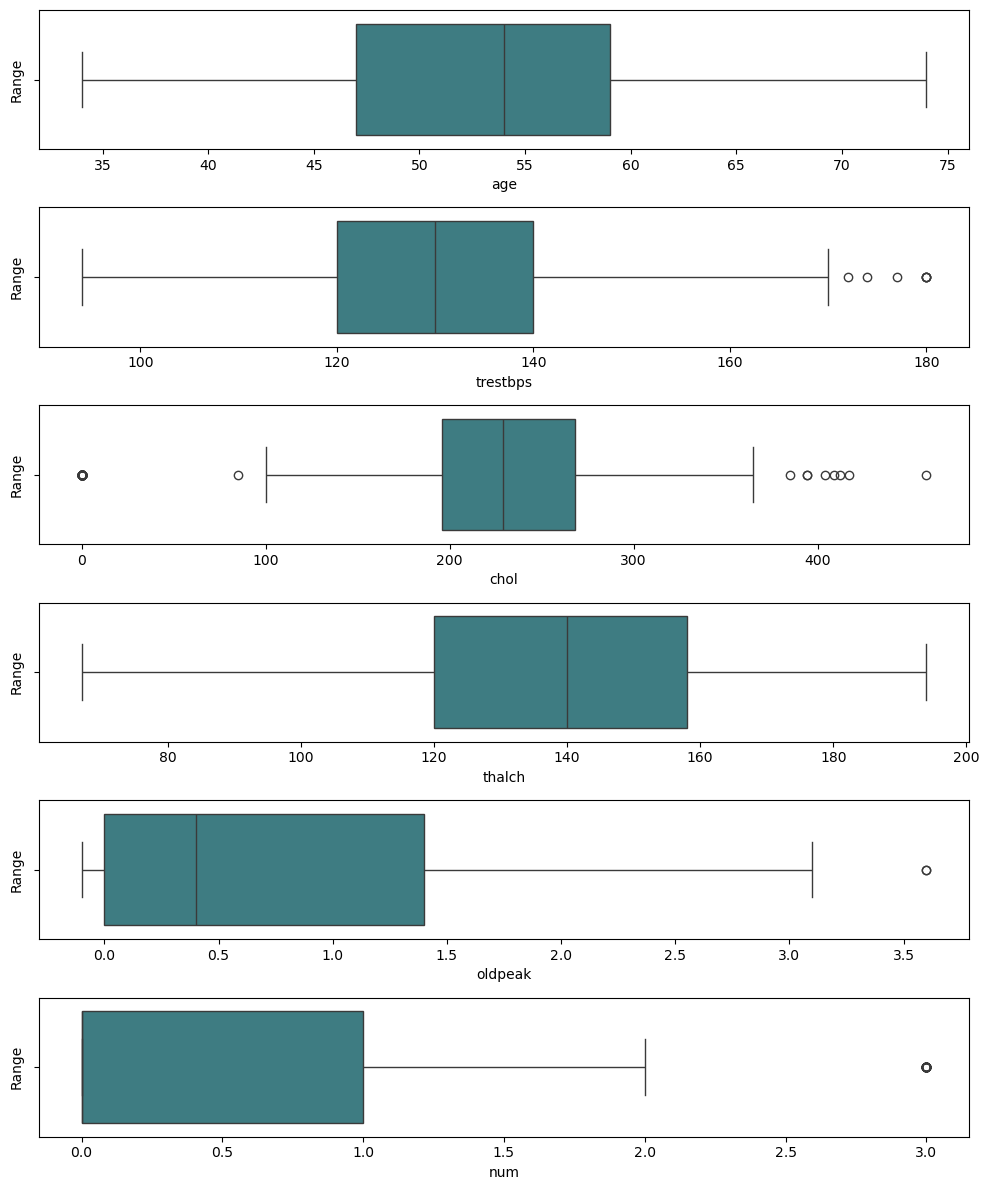

In [42]:
box_plot(cleaned_data[num_features])


As we see that outliers are reduced

In [44]:
data_scores = cleaned_data.copy()# data values scores based on isolation forest decision function in scale of 0 to 1
data_scores["scores"] = iso_forest.decision_function(cleaned_data[num_features])
data_scores

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,scores
0,63,1,3,145,233,True,0,150,0,2.300000,0,0,0,0.049083
1,41,1,1,135,203,False,1,132,0,0.000000,1,0,0,0.085887
2,57,1,0,140,192,False,1,148,0,0.400000,1,0,0,0.089676
3,52,1,3,118,186,False,0,190,0,0.000000,1,0,0,0.026331
4,57,1,0,110,201,False,1,126,1,1.500000,1,0,0,0.054029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,57,1,0,110,0,False,2,131,1,1.400000,2,2,3,0.003687
864,65,1,0,150,236,True,2,105,1,0.000000,1,1,3,0.021951
865,63,1,2,130,0,False,2,111,1,0.000000,1,2,3,0.019378
867,69,1,0,140,208,False,2,140,1,2.000000,2,0,3,0.014502


# feature Scalling

In [46]:
from sklearn.preprocessing import StandardScaler
data = cleaned_data
scaler = StandardScaler()
std_scaled_num_data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)


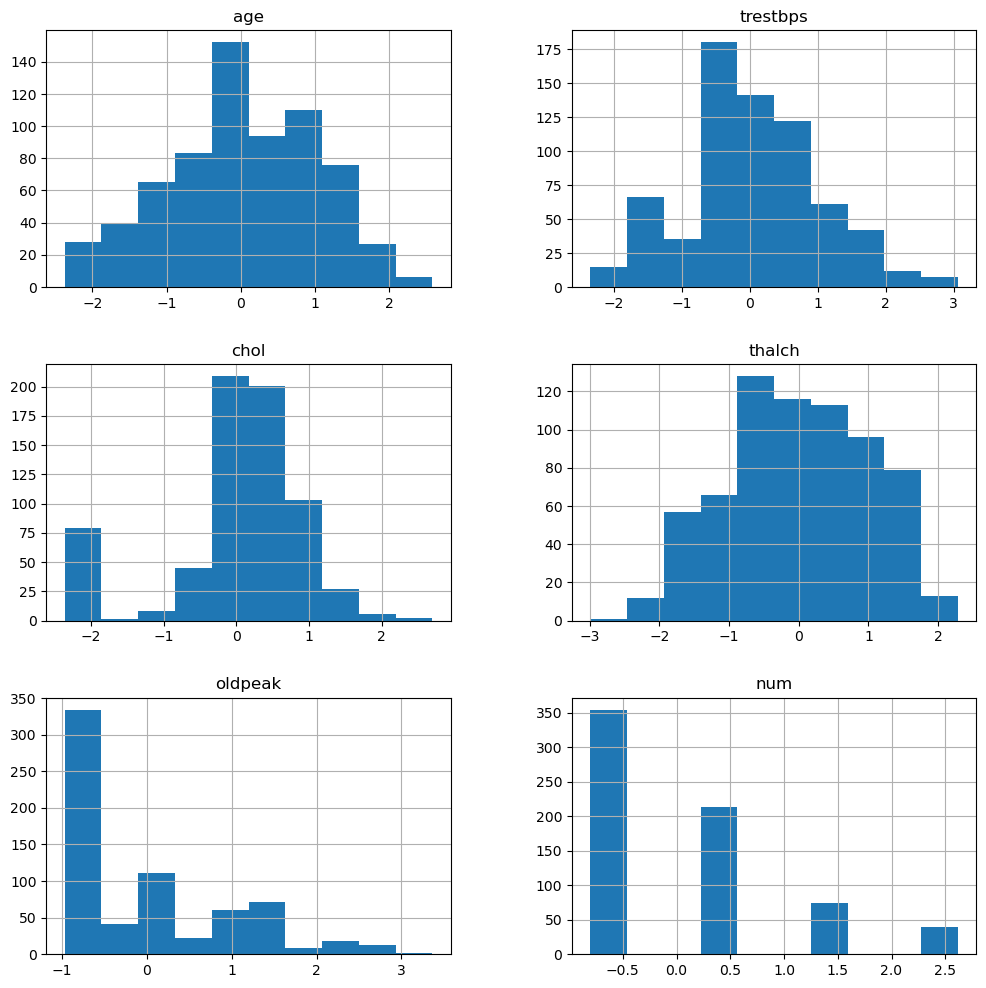

In [47]:
std_scaled_num_data[num_features].hist(figsize = (12,12))# # visualizing numerical data features
plt.show()

Visualization of standard scaler data for numerical features

Let's apply minmax scaler

In [50]:
from sklearn.preprocessing import MinMaxScaler
data = cleaned_data
scaler = MinMaxScaler()
mimx_scaled_num_data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

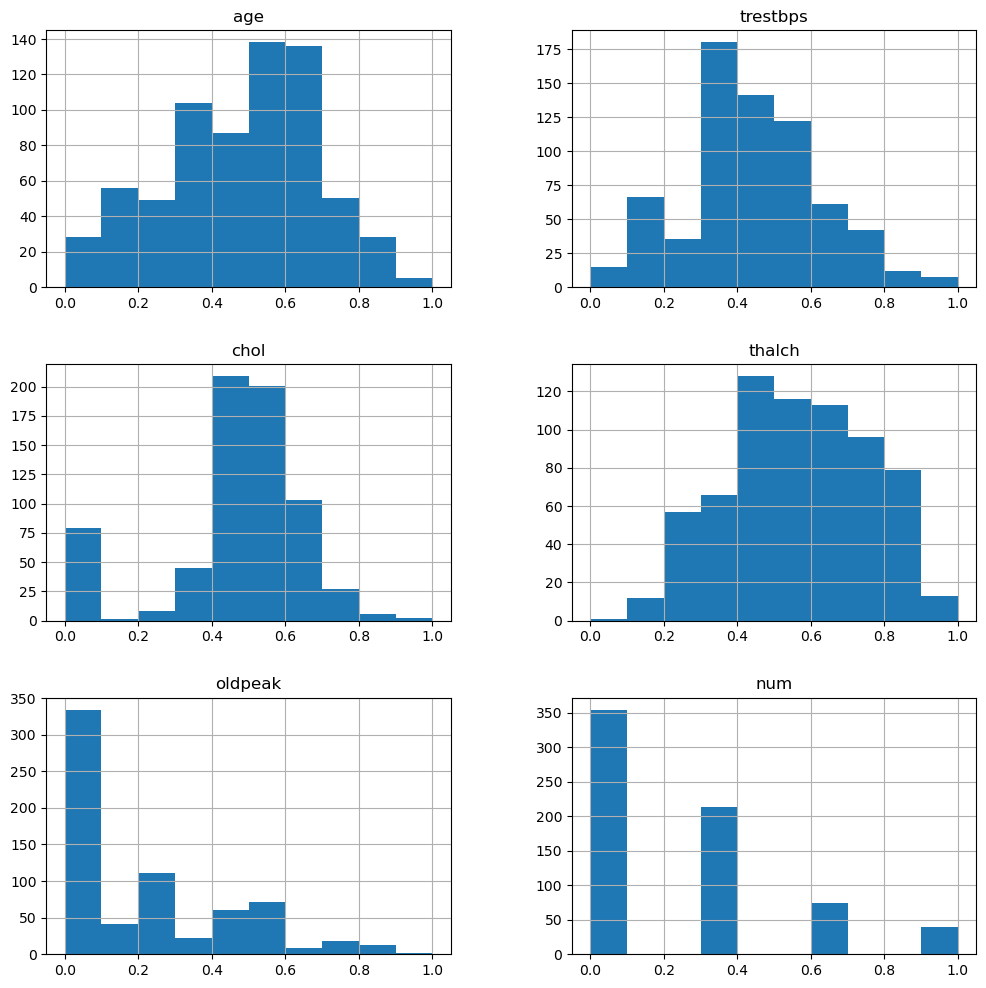

In [51]:
mimx_scaled_num_data[num_features].hist(figsize = (12,12))# # visualizing numerical data features
plt.show()

Let's apply lo transformation to keep the outliers as it is 

In [53]:
# Add a small constant to avoid log(0)
log_tfm_data = np.log1p(cleaned_data)  # np.log1p is equivalent to np.log(1 + x)
#log_tfm_data

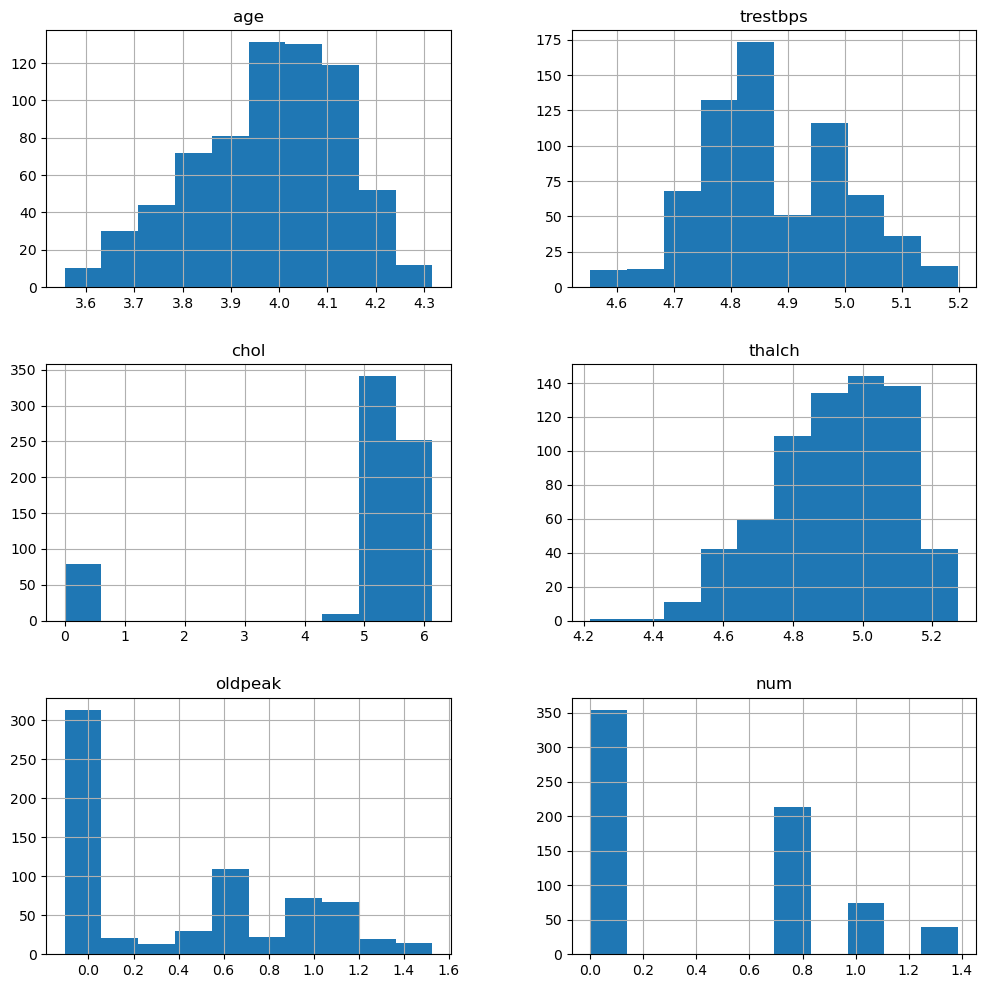

In [54]:
log_tfm_data[num_features].hist(figsize = (12,12))# # visualizing numerical data features
plt.show()

Let's visualize pairplot correlation between features to target



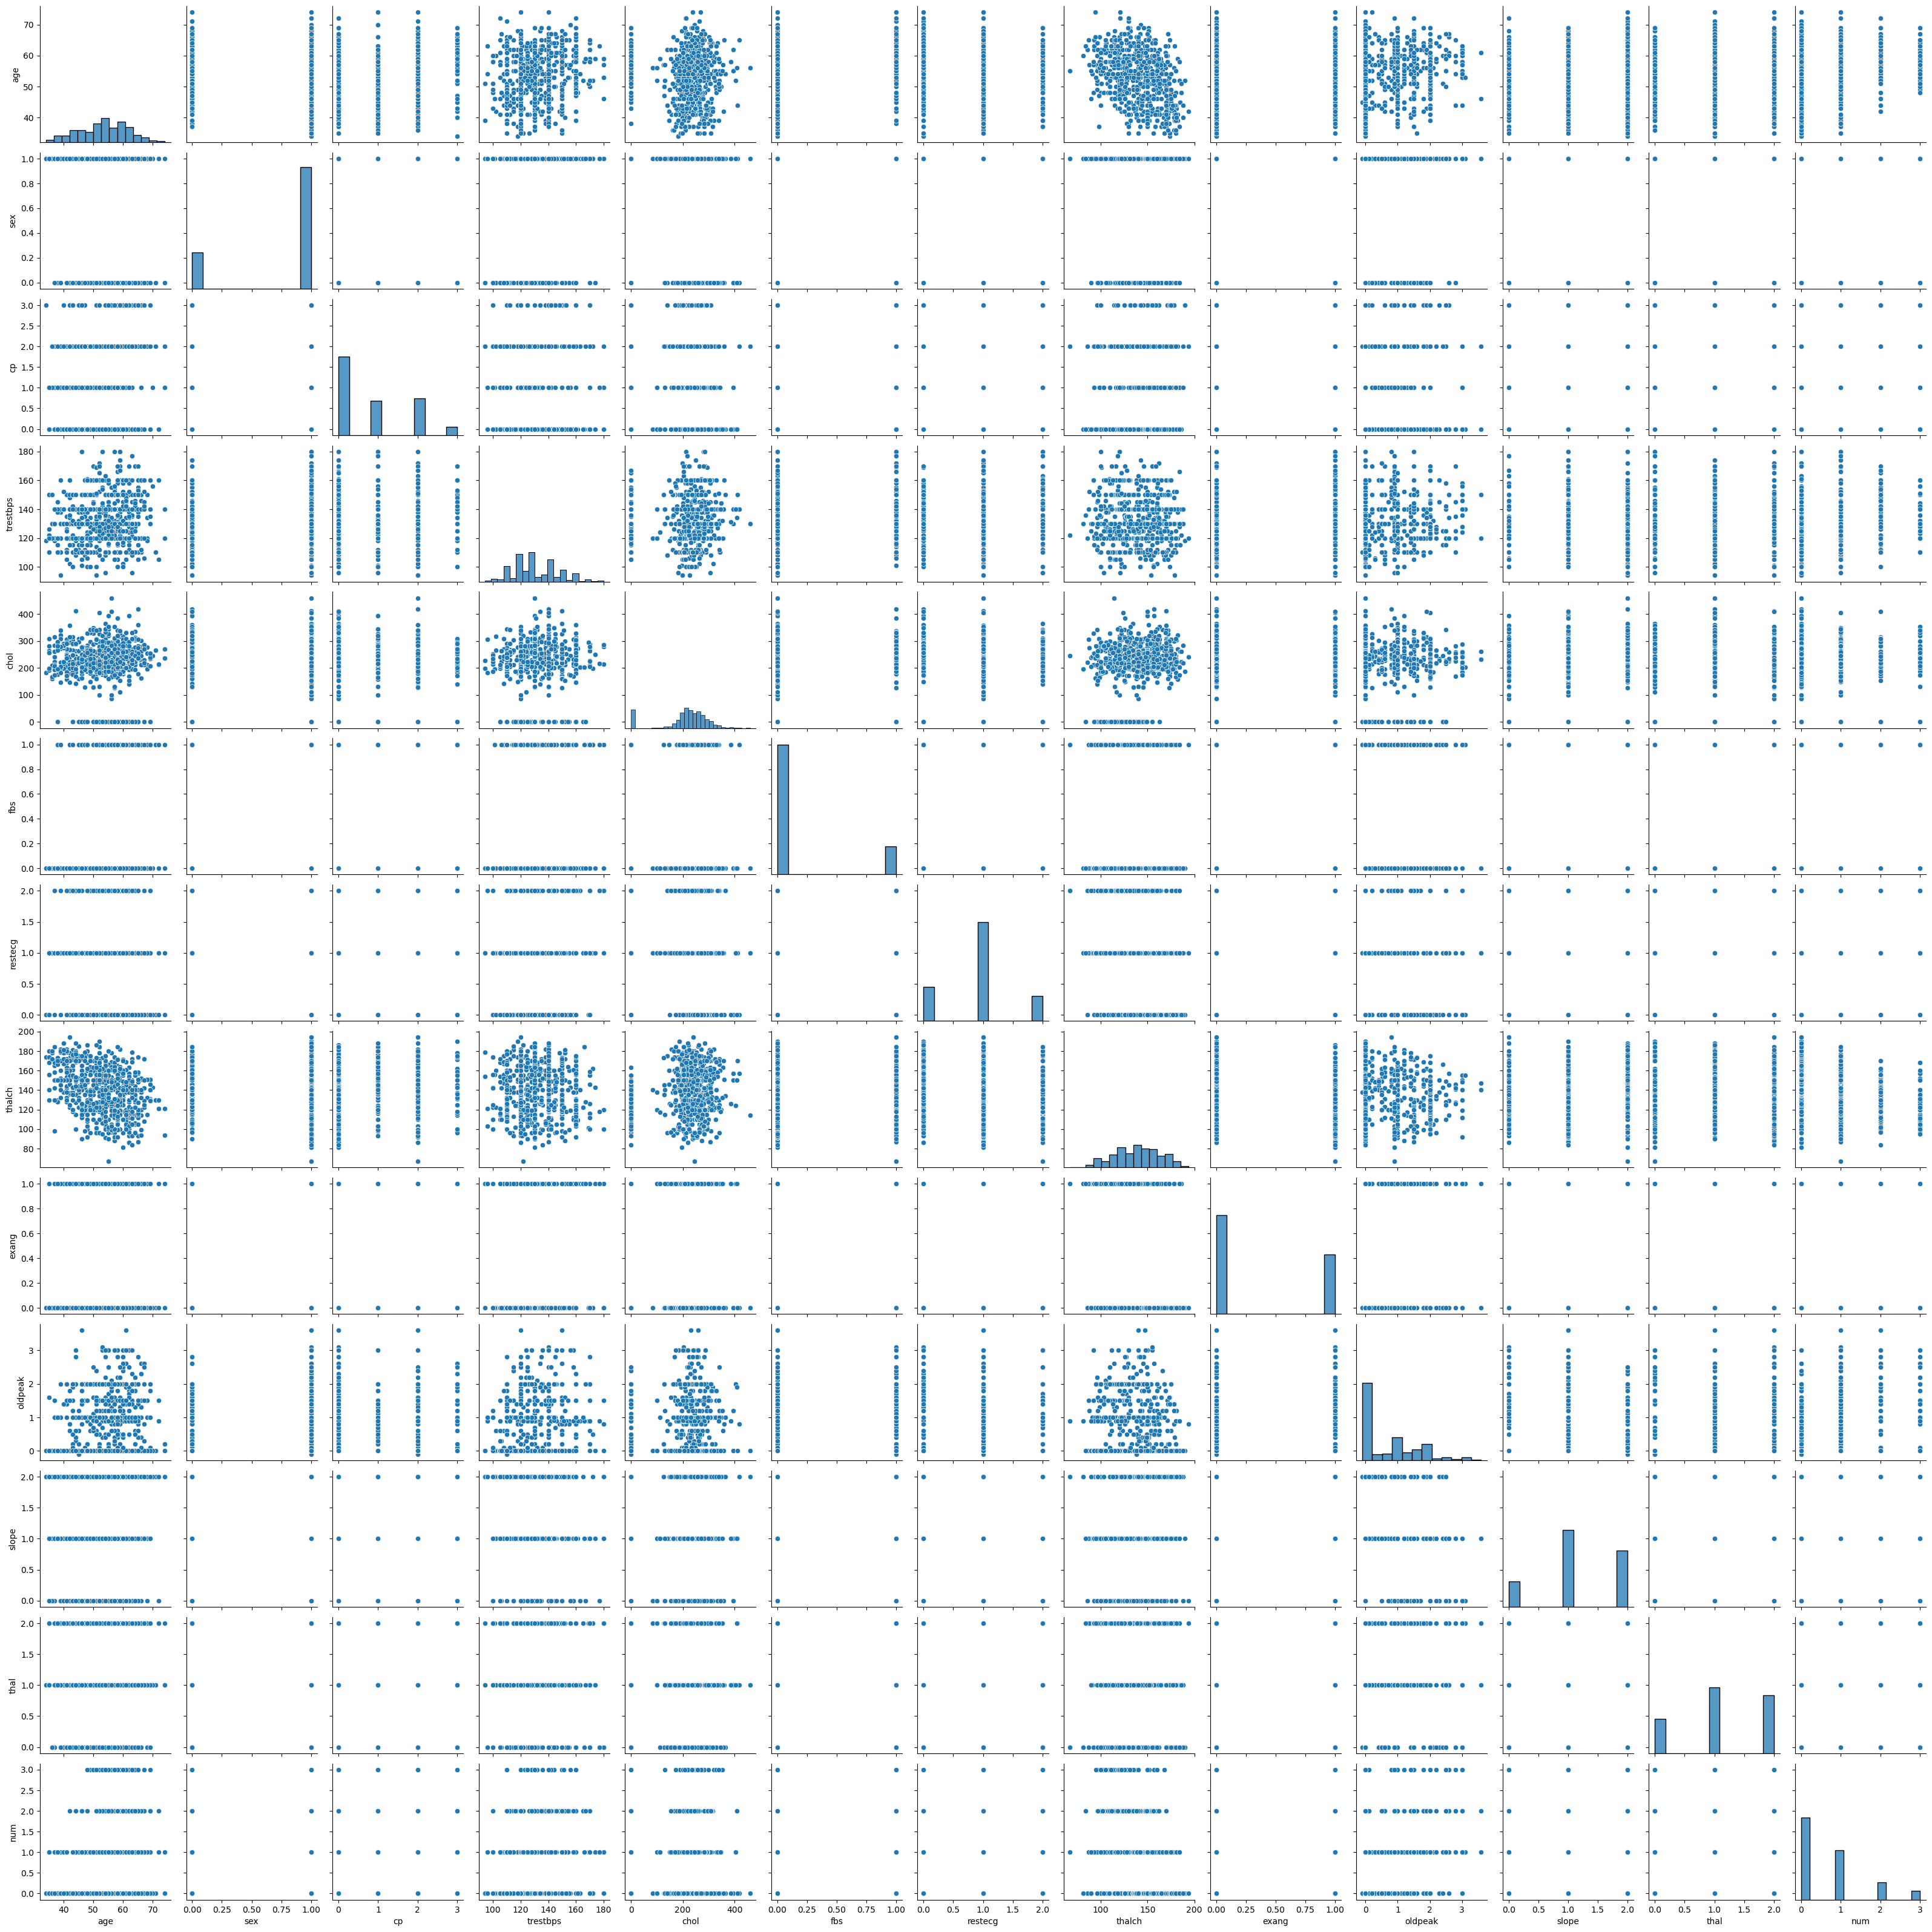

In [56]:
sns.pairplot(cleaned_data)


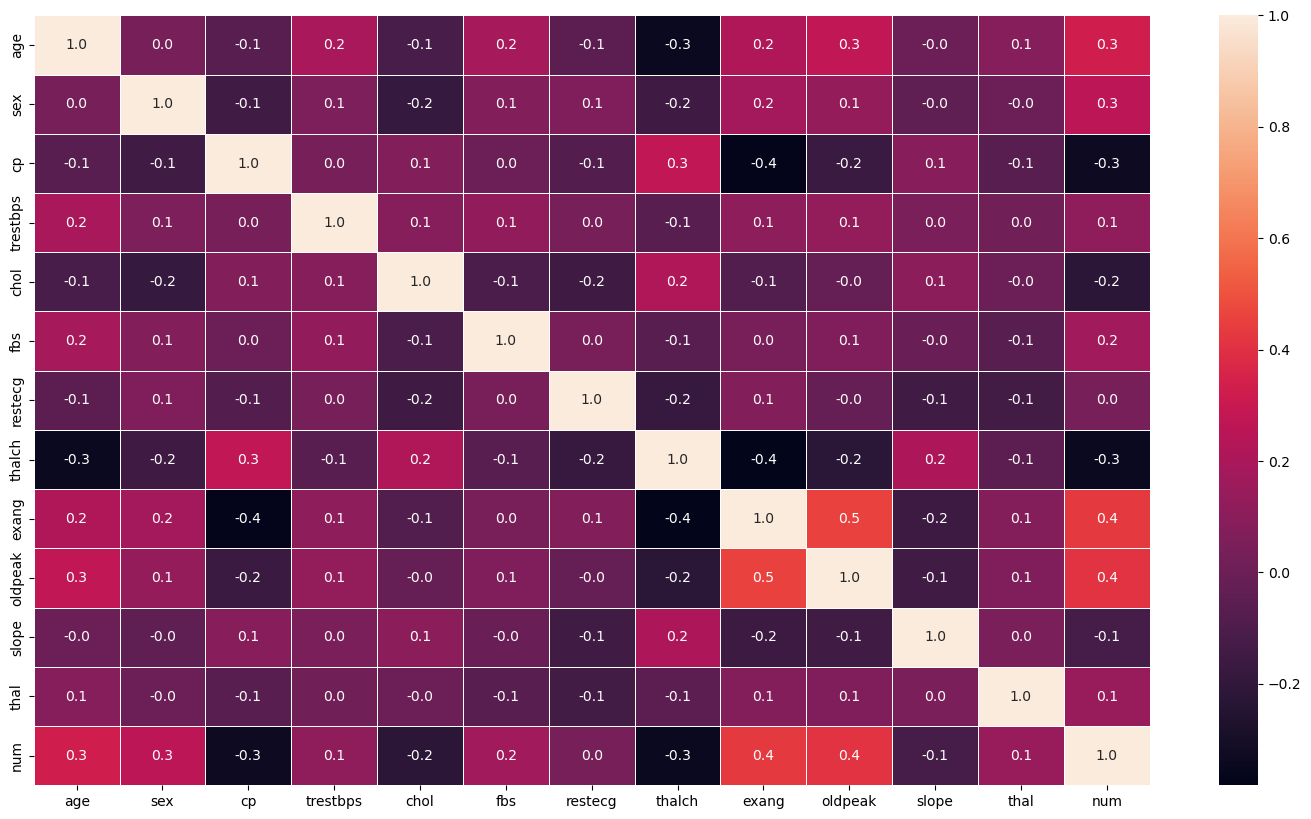

In [57]:
f,ax = plt.subplots(figsize=(18,10))
sns.heatmap(cleaned_data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

PPS Matrix

In [59]:
pip install ppscore

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ppscore (from versions: none)
ERROR: No matching distribution found for ppscore


In [60]:
import ppscore as pps
# Calculate PPS matrix
pps_matrix = pps.matrix(cleaned_data)

# Display PPS matrix
pps_matrix_filtered = pps_matrix[(pps_matrix['ppscore'] > 0.0) & (pps_matrix['x'] != pps_matrix['y'])]
pps_matrix_pivot = pps_matrix_filtered.pivot(columns='x', index='y', values='ppscore')

plt.figure(figsize=(12, 6))
sns.heatmap(pps_matrix_pivot, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('PPS Matrix')
plt.show()

ModuleNotFoundError: No module named 'ppscore'

Decision tree classification:

Lets split the data into train and tesitng of the data

In [ ]:
from sklearn.model_selection import trai_test_split
x=log_tfm_data.drop(columns=["num"])
y=cleaned_data["num"]
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

In [ ]:
DecisonTreeClassifier()

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
dtc.feature_importances_


In [ ]:
features_imp_scores = pd.DataFrame(dtc.feature_importances_, index= X.columns)
features_imp_scores[0].sort_values(ascending=False)

# Hyperparameter Tuning:


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

In [ ]:
X = log_tfm_data.drop(columns=["num"])
y =cleaned_data["num"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42, sampling_strategy={1: 273, 2: 273, 3: 273})
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the model and reduced parameter grid
clf = GradientBoostingClassifier(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, scoring='f1_weighted', cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train_resampled, y_train_resampled)
best_clf = random_search.best_estimator_

# Model Evaluation and Analysis:


In [ ]:
# Predict and evaluate on the test set
y_pred = best_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
feature_names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'thal']
class_names = ["0","1","2","3"]
# Plot the decision tree
plt.figure(figsize=(20, 20))
plot_tree(dtc, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=12)
plt.title("Decision Tree Visualization")
plt.show()

# Interview Questions

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Ans: Examples of hyperparameters include the learning rate, regularization strength, and the choice of optimization algorithm. When we define these hyperparameters, the model can control the features of the learning process and possibly impact its performance and behavior.


2.What is the difference between the Label encoding and One-hot encoding?

Ans: Label encoding and one hot encoding both are used for convertin categorical data into numerical format. Label encoding converts categorical data into numerical column but it forms only one column. Where as one hot encoding acts as like get_dummies method . As it forms each values one column